In [5]:
import pandas as pd
import numpy as np

weather = pd.read_csv('weather.csv')

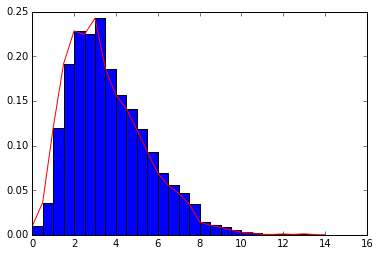

In [6]:
# Wahrscheinlichkeitsdichte

from matplotlib import pyplot as plt
%matplotlib inline

hist, bin_edges = np.histogram(weather['v_wind'], bins=np.arange(0, 15, 0.5), density=True)
plt.bar(bin_edges[0:29], hist, width=0.5)
plt.plot(bin_edges[0:29], hist, color='red')
plt.show()

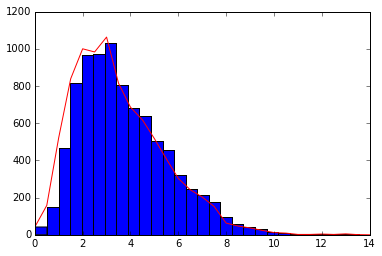

In [7]:
# Histogramm Eintrittshäufigkeit

from matplotlib import pyplot as plt
%matplotlib inline

bins = int(np.ceil(max(weather['v_wind']))) * 2
plt.hist(weather['v_wind'], bins=bins)

hist, bin_edges = np.histogram(weather['v_wind'], bins=np.arange(0, 15, 0.5), density=False)
plt.plot(bin_edges[0:29], hist, color='red')

plt.show()

In [8]:
# half the time wind speed is below the median
print(weather['v_wind'].median())

# different way to calculate median
step = 0.01
bins = np.arange(0, 15, step)
hist, bin_edges = np.histogram(weather['v_wind'], bins=bins, density=True)
cumsum = pd.Series(data=(hist * step).cumsum(), index=bins[0:-1])
median = cumsum[cumsum>0.5].index[0]
print(median)

3.3752950000000004
3.37


In [9]:
print(weather['v_wind'].mean())

# different way to calculate mean
step = 0.01
bins = np.arange(0, 15, step)
hist, bin_edges = np.histogram(weather['v_wind'], bins=bins, density=False)
mean = sum(hist * bin_edges[0:-1]) / 8760
print(mean)

3.73718101317
3.73221575342


In [10]:
weather['v_wind'].std()

1.8830684549406382

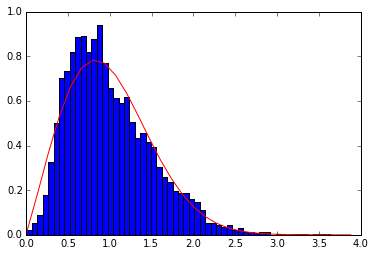

In [11]:
# Weibull nach http://www.wind-power-program.com/wind_statistics.htm

from matplotlib import pyplot as plt
%matplotlib inline

def calculate_weibull_parameters(wind_std, wind_mean):
    
    k = (0.9874 / (wind_std / wind_mean)) ** 1.0983

    x_gamma = 1 + 1 / k
    gamma = (0.1693 * x_gamma ** 4 - 1.1495 * x_gamma ** 3 +
             3.3005 * x_gamma ** 2 - 4.393 * x_gamma + 3.0726)
    
    return (k, gamma)

def weibull(k, gamma, x):
    # x = v_wind / v_wind_mean
    return k * gamma * (x * gamma) ** (k - 1) * np.exp(-(x * gamma) ** k)

wind_std = weather['v_wind'].std()
wind_mean = weather['v_wind'].mean()
(k, gamma) = calculate_weibull_parameters(wind_std, wind_mean)
x = np.arange(0, 15, 0.5) / wind_mean
weibull_values = weibull(k, gamma, x)

plt.plot(x, weibull_values, color='red')

hist, bin_edges = np.histogram(weather['v_wind'] / wind_mean, bins='auto', density=True)
plt.bar(bin_edges[0:-1], hist, width=np.diff(bin_edges))

plt.show()